#
# SENTIMENT ANALYSE
#

## IMPORT

In [1]:
import pandas as pd ## manip dataframe
import numpy as np ## opérations sur vecteurs
import matplotlib.pyplot as plt  ## visualisation
import re ### regular expressions

from gensim.models import Word2Vec, Phrases ## Pour entrainer le modèle word2vec 

from wordcloud import WordCloud ## nuage de mots

import nltk ## traitement sur le texte

nltk.download('punkt') ## nltk tokenizer requiert punkt package
from nltk import word_tokenize ## fonction pour tockenizer

from nltk.corpus import stopwords ##  stopwords dans différentes langues

nltk.download('stopwords')## nltk corpus requiert punkt package
nltk.download('wordnet') ## nltk stem requiert punkt package

from nltk.stem import WordNetLemmatizer # Lemmatizer

from collections import defaultdict  # For word frequency

from tqdm.auto import tqdm # for progress bar

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\theoj\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\theoj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\theoj\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#
# I) READ DATAFRAME
#

## ALTERNATIVE FOR PRIVATE FILE :
## OPEN YOUR DRIVE IN LOCAL

In [2]:
"""
from google.colab import drive

import pandas as pd

drive.mount('/content/gdrive')

df_label_raw = pd.read_csv('/content/gdrive/MyDrive/Cours/Machine Learning/NLP - languages/Sentiment_Analysis/labeledTrainData.tsv', sep="\t", error_bad_lines=False)
print(df_label_raw.shape)

df_unlabel_raw = pd.read_csv('/content/gdrive/MyDrive/Cours/Machine Learning/NLP - languages/Sentiment_Analysis/unlabeledTrainData.tsv', sep="\t", error_bad_lines=False)
"""

'\nfrom google.colab import drive\n\nimport pandas as pd\n\ndrive.mount(\'/content/gdrive\')\n\ndf_label_raw = pd.read_csv(\'/content/gdrive/MyDrive/Cours/Machine Learning/NLP - languages/Sentiment_Analysis/labeledTrainData.tsv\', sep="\t", error_bad_lines=False)\nprint(df_label_raw.shape)\n\ndf_unlabel_raw = pd.read_csv(\'/content/gdrive/MyDrive/Cours/Machine Learning/NLP - languages/Sentiment_Analysis/unlabeledTrainData.tsv\', sep="\t", error_bad_lines=False)\n'

## MY VERSION FOR PUBLIC FILE

In [3]:
url = "https://drive.google.com/file/d/1u1fJ5riF5gWxzS15Tk6Opgq0prl5_3ew/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_label_raw = pd.read_csv(path, sep="\t")
print(df_label_raw.shape)

(25000, 3)


In [4]:
url = "https://drive.google.com/file/d/1aNrDPowfpuWMpqgh1Q8y5YwJo2lgg_QI/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df_unlabel_raw = pd.read_csv(path, sep="\t", error_bad_lines=False)
print(df_unlabel_raw.shape)

b'Skipping line 43043: expected 2 fields, saw 3\n'


(49998, 2)


## DROP ID COLUMN

In [5]:
df_label_raw = df_label_raw.drop("id", axis=1)

In [6]:
df_label_raw.head()

,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


In [7]:
df_unlabel_raw = df_unlabel_raw.drop("id", axis=1)

In [8]:
df_unlabel_raw.head()

,review
0,"Watching Time Chasers, it obvious that it was ..."
1,I saw this film about 20 years ago and remembe...
2,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,I went to see this film with a great deal of e...
4,"Yes, I agree with everyone on this site this m..."


## CREATE LIST OF DATASETS : datasets

In [9]:
df_label = df_label_raw.copy(deep=True)
df_unlabel = df_unlabel_raw.copy(deep=True)
datasets = [df_label, df_unlabel]

#
# II) SHOW DATAFRAME
#

In [10]:
titles = ["LABEL", "UNLABEL"]

for df, title in zip(datasets, titles):
    print(title.center(30, " "))
    
    display(df.head())
    display(df.info())
    print()

            LABEL             


,sentiment,review
0,1,With all this stuff going down at the moment w...
1,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,0,The film starts with a manager (Nicholas Bell)...
3,0,It must be assumed that those who praised this...
4,1,Superbly trashy and wondrously unpretentious 8...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  25000 non-null  int64 
 1   review     25000 non-null  object
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


None


           UNLABEL            


,review
0,"Watching Time Chasers, it obvious that it was ..."
1,I saw this film about 20 years ago and remembe...
2,"Minor Spoilers<br /><br />In New York, Joan Ba..."
3,I went to see this film with a great deal of e...
4,"Yes, I agree with everyone on this site this m..."


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49998 entries, 0 to 49997
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  49998 non-null  object
dtypes: object(1)
memory usage: 390.7+ KB


None

Repartition of sentiments in df_label.


<AxesSubplot:ylabel='sentiment'>

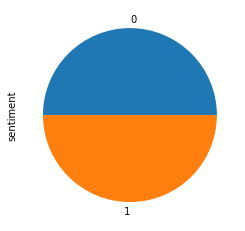

In [11]:
print("Repartition of sentiments in df_label.")
datasets[0]["sentiment"].value_counts().plot(kind="pie")

In [12]:
datasets[0]["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

#
# III) CLEAN DATAFRAME
#

## DEF clean_text

In [13]:
def clean_text(txt: str) -> str:
    """
    clean_text : remove "numbers, spec caracs, <br \>" in string
    
    params:
        txt -> string : string to clean
    return:
        txt -> string : cleaned string
    """

    substr_to_remove = ["<br", "/>"]
    for substr in substr_to_remove:
        txt = txt.replace(substr, "")
        
    # en regex "^" spécifie de ne garder que les carac spécifiés
    #print(re.sub(r"[A-Z|a-z| |']", r" ", txt))
    txt = re.sub(r"[^A-Z|a-z]", r" ", txt)

    txt = txt.lower()
    
    return txt

In [14]:
clean_text?

Signature: clean_text(txt: str) -> str
Docstring:
clean_text : remove "numbers, spec caracs, <br \>" in string

params:
    txt -> string : string to clean
return:
    txt -> string : cleaned string
File:      d:\code\cours\nlp\<ipython-input-13-443aeabc333c>
Type:      function


In [15]:
string = "this is my test !,.;:€$\g <br heghsgg />"

print("BEFORE".center(50, " "))
print(string)
print()
print("AFTER".center(50, " "))
print(clean_text(string))

                      BEFORE                      
this is my test !,.;:€$\g <br heghsgg />

                      AFTER                       
this is my test         g  heghsgg 


## DEF remove_stop_words

In [16]:
#def remove_stop_words(txt: str, stop_words: list()) -> str:
def remove_stop_words(txt: list) -> list:
    """
    remove_stop_words : remove useless words in string
    
    params:
        txt -> list : list of string to remove stop words
    return:
        txt -> string : list of string without stop words
    """
    
    """
    txt = " " + txt + " "
    for stop_word in stop_words:
        txt = txt.replace(" " + stop_word + " ", " ")
    """

    txt = [x for x in txt if x not in stop_words]
    return txt
    
    return txt

In [17]:
stop_words = stopwords.words("english")
new_stop_words = ["movie", "film", "actor"]
stop_words.extend(new_stop_words)

string_list = "wtf is that   shit".split()
remove_stop_words(string_list)

['wtf', 'shit']

## DEF lemmatize

In [18]:
lemmatizer = WordNetLemmatizer()

def lemmatize(tokens: list) -> list:
    """
    Convert words from list to their common base forms
    Params
        tokens -> list : list of words to lemmatize
    Return
        lemmatized_tokens -> list: list of lemmatized words
    """
    
    for i in ["a", "v"]:
        tokens = list(map(lambda x: lemmatizer.lemmatize(x, i), tokens))
    
    return tokens

In [19]:
lemmatize(["Hello", "had", "prettier", "dogs"])

['hello', 'have', 'pretty', 'dog']

## DEF preprocess

In [20]:
def preprocess(txt: str) -> list:
    """
    Cleans, Tokenize, lemmatize text and remove stop words
    Params:
        txt -> str: text to preprocess
    Return:
        txt -> str: preprocessed text
    """
    
    txt = clean_text(txt)
    
    txt = word_tokenize(txt)
    
    txt = remove_stop_words(txt)
    
    txt = lemmatize(txt)
    
    return txt

In [21]:
preprocess("Hello user!How are you? I have 8 <br /> prettier\ dogs! according to")

['hello', 'user', 'pretty', 'dog', 'accord']

## APPLY preprocess ON DATAFRAMES

In [22]:
datasets[0]["review"][0]

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [23]:
# show progress bar
tqdm.pandas()

for df in datasets:
    df["review"] = df["review"].progress_apply(preprocess)

  0%|          | 0/25000 [00:00<?, ?it/s]

  0%|          | 0/49998 [00:00<?, ?it/s]

In [30]:
all_reviews = pd.concat([df_label, df_unlabel], ignore_index=True)["review"]

print("Total number of reviews:", len(all_reviews))
pd.DataFrame(all_reviews)

Total number of reviews: 74998


,review
0,"[stuff, go, moment, mj, start, listen, music, ..."
1,"[classic, war, worlds, timothy, hines, enterta..."
2,"[start, manager, nicholas, bell, give, welcome..."
3,"[must, assume, praise, great, film, opera, eve..."
4,"[superbly, trashy, wondrously, unpretentious, ..."
...,...
74993,"[original, man, eater, joe, amato, somewhat, c..."
74994,"[home, box, office, early, days, movies, like,..."
74995,"[griffin, dunne, bear, cultural, family, fathe..."
74996,"[bad, story, low, budget, rear, ugly, head, ti..."


## USER WORDCLOUD

In [32]:
df_train_pos = df_label[df_label["sentiment"] == 1]
df_train_neg = df_label[df_label["sentiment"] == 0]

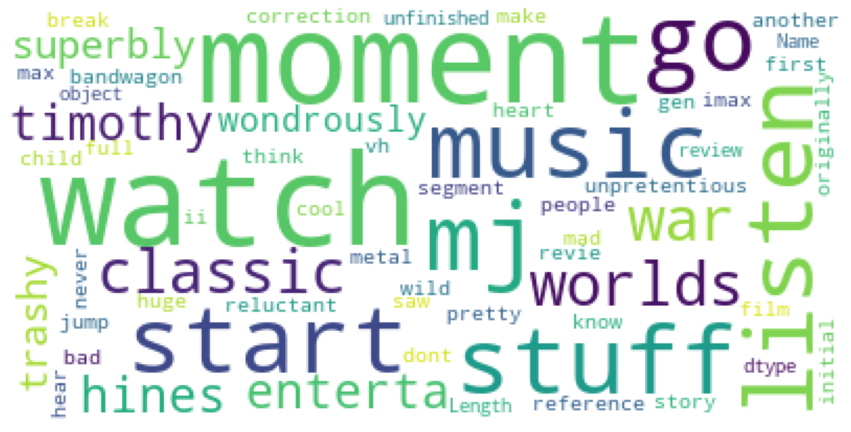

In [47]:
# wordcloud for positive sentiment
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="white", random_state=42).generate(str(df_train_pos["review"]))
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

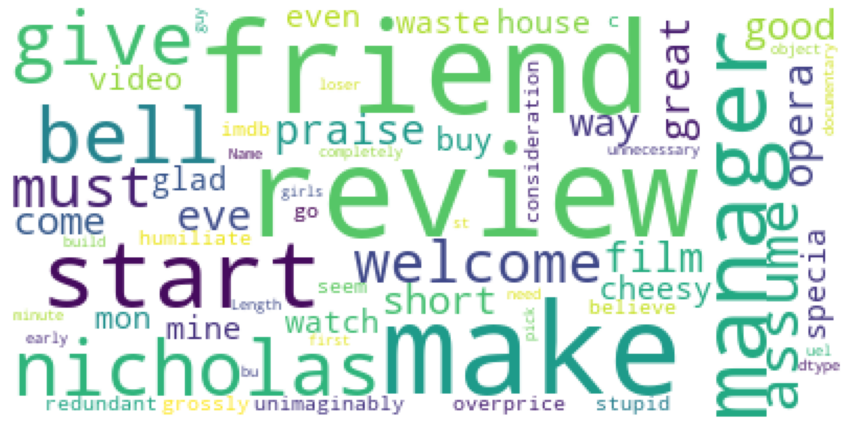

In [46]:
# wordcloud for negative sentiment
wordcloud = WordCloud(max_font_size=60, max_words=100, background_color="white", random_state=42).generate(str(df_train_neg["review"]))
plt.figure(figsize=(15, 25))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

#
# IV) BIGRAM TRANSFORMER
#
## bigram_transformer MERGE SOME WORDS WHEN THEY APPEAR AT THE SAME TIME
## DECORATOR %%time SHOW TIMER

In [54]:
%%time
bigram_transformer = Phrases(all_reviews)

Wall time: 13.3 s


#
# V) WORD2VEC
#

In [60]:
%%time

from gensim.models import word2vec

num_features = 300
min_word_count = 40
num_workers = 4
context = 10

model = word2vec.Word2Vec(sentences=bigram_transformer[all_reviews],
                         workers=num_workers,
                         size=num_features,
                         min_count=min_word_count,
                         window=context)

model_name = f"{num_features}size{min_word_count}min_count{num_workers}workers{context}window"
model.save(model_name)

Wall time: 3min 19s


## VISUALIATION OF VECTORS

In [61]:
word_vectors = pd.DataFrame(model.wv.vectors, index=model.wv.index2word)
print("word vector dimension:", word_vectors.shape)
word_vectors.head()

word vector dimension: (15483, 300)


,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
one,-0.316018,0.598601,-0.516800,0.422823,-0.474487,-1.839252,1.322942,0.448751,-0.782330,-0.061325,...,0.346678,0.135309,0.489101,-0.047944,-0.102392,0.074141,0.345510,-0.492699,-0.003524,0.678940
make,-0.071290,-0.163490,-0.695732,0.363036,-0.586610,1.000331,0.233848,-0.325415,-0.789743,-0.690280,...,0.626094,0.884560,1.298734,0.016510,0.385738,0.897247,-0.633973,-0.184419,-0.461342,-0.126415
good,-0.183669,-0.119116,0.231368,0.077160,0.272986,-0.824232,0.329010,1.208498,0.784077,1.852768,...,0.110271,0.735901,1.298443,0.249194,0.415119,1.164266,1.796332,1.320884,-0.248837,0.296543
like,-0.471197,1.024566,-0.345232,1.010561,0.401355,-0.618141,-0.594047,0.515241,0.897146,1.023327,...,-0.683747,0.416951,0.379790,0.325993,-1.185001,0.462634,0.338377,-0.014623,-1.676471,1.054690
see,-1.391797,-0.609163,-2.052211,-0.756602,0.646209,-0.099115,0.185798,0.077955,0.849073,-0.891604,...,1.004325,1.083492,0.812991,-0.531331,0.554989,-0.343170,0.620893,0.727077,-0.001824,-0.076540


## OBSERVATIONS

In [64]:
print(model.wv.similarity("data", "information"))
print(model.wv.similarity("peace", "data"))

0.73676753
0.42559525


In [67]:
model.wv.most_similar("data")

[('scientific', 0.8111076354980469),
 ('systems', 0.8060742020606995),
 ('operations', 0.7949966192245483),
 ('theories', 0.7860960364341736),
 ('code', 0.7812164425849915),
 ('cod', 0.7700244188308716),
 ('us_government', 0.7699715495109558),
 ('materials', 0.7684646844863892),
 ('experts', 0.7682573795318604),
 ('government', 0.7656392455101013)]

In [71]:
model.wv.most_similar(positive=["data"], negative=["violence"], topn=10)

[('nasa', 0.6992340087890625),
 ('engineer', 0.6552988886833191),
 ('enterprise', 0.6493238210678101),
 ('council', 0.6278681755065918),
 ('commission', 0.6179033517837524),
 ('satellite', 0.61683589220047),
 ('ceo', 0.6147123575210571),
 ('materials', 0.6095463633537292),
 ('corporation', 0.6010137796401978),
 ('invention', 0.5998692512512207)]

In [68]:
print(model.wv.doesnt_match("man woman dog child kitchen".split()))

kitchen


c:\users\theoj\appdata\local\programs\python\python39\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


#
# VI)
#

In [75]:
def aggregate_vector_model(words: list, model: Word2Vec, num_features: int):
    # Pre-initialising empty numpy array for speed
    featureVec = np.zeros(num_features, dtype="float32")
    counter = 0

    #Converting Index2Word which is a list to a set for better speed in the execution.
    index2word_set = set(model.wv.index2word)

    for word in words:
        if word in index2word_set:
            counter += 1
            featureVec = np.add(featureVec,model[word]) ## add word vectors element by element

    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, counter)

    return featureVec

In [79]:
# Function for calculating the average feature vector
def get_average_vector_model(reviews: pd.Series, model: Word2Vec, num_features: int):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features), dtype="float32")

    for review in tqdm(reviews):
        reviewFeatureVecs[counter] = aggregate_vector_model(review, model, num_features)
        counter += 1

    return reviewFeatureVecs

In [83]:
%%time
df_train_vect = get_average_vector_model(df_label.review, model, num_features)
df_test_vect = get_average_vector_model(df_unlabel.review, model, num_features)

  0%|          | 0/25000 [00:00<?, ?it/s]

<ipython-input-75-55699ff90785>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word]) ## add word vectors element by element


  0%|          | 0/49998 [00:00<?, ?it/s]

Wall time: 1min 7s


In [82]:
pd.DataFrame(df_train_vect)

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.116133,-0.166299,-0.229024,-0.157574,0.063004,-0.249710,0.005552,0.093678,0.067588,0.127262,...,0.155325,0.172122,0.229159,0.057498,0.081120,0.025800,0.177930,-0.052427,-0.048505,-0.034664
1,0.304122,-0.226038,-0.085234,0.088801,0.014336,0.071126,-0.089303,-0.046984,0.069008,0.170476,...,0.051655,0.042682,0.059998,0.007093,0.025782,0.288394,-0.199028,0.163943,0.122672,0.054530
2,0.048455,-0.157232,0.019447,0.041338,0.101832,-0.146805,0.138706,0.020427,-0.082285,0.034299,...,0.066293,-0.085694,0.032462,-0.054751,0.056683,-0.087197,0.015682,-0.152771,-0.132210,0.070360
3,0.089516,-0.177277,-0.148995,-0.121388,0.091735,0.006405,-0.227478,-0.133069,0.033527,0.307117,...,-0.046694,-0.038182,-0.030126,-0.009848,0.201065,0.018966,0.048810,-0.304148,0.079442,0.028342
4,-0.031768,0.018084,-0.156065,0.038988,0.148118,-0.139451,0.080201,0.078188,-0.045151,0.185657,...,0.178639,0.078080,0.148390,0.028325,0.111609,0.000319,0.031533,-0.231899,-0.120977,0.111429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.063329,-0.117346,-0.311727,0.022217,0.188685,-0.007351,-0.255890,0.436548,0.157761,0.171389,...,0.459096,0.092585,0.248207,-0.130104,0.083219,-0.032133,0.198972,0.002322,-0.152852,0.070828
24996,0.185707,-0.061197,-0.052783,-0.172958,0.146655,-0.097085,0.304941,0.100736,-0.068530,0.145378,...,0.224868,-0.175722,0.183878,-0.269237,-0.087059,0.309072,0.298564,0.032510,-0.007779,-0.018115
24997,0.202907,-0.163873,-0.288236,-0.162906,-0.133435,-0.406934,0.240119,0.331397,0.049369,0.082658,...,0.432799,0.122769,0.430962,-0.175318,0.012528,0.215408,0.219510,-0.011206,-0.189605,-0.298749
24998,0.236658,-0.103421,-0.001507,-0.010416,-0.147667,-0.091008,-0.108157,0.104416,-0.261278,0.038989,...,0.106539,0.204139,0.007116,-0.164337,-0.062974,0.220707,-0.161868,-0.299287,0.185116,0.152045


#
# VII) RANDOM FOREST
#

In [89]:
%%time
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50)
data_train_vect = np.nan_to_num(data_train_vect)

print("Fitting random forest to training data ...")
clf = clf.fit(df_train_vect, df_label["sentiment"])

Fitting random forest to training data ...
Wall time: 17 s


In [93]:
y_hat = clf.predict(df_test_vect)

output = pd.DataFrame(data={"review" : df_unlabel["review"], "sentiment" : y_hat})

In [94]:
from sklearn.metrics import accuracy_score

accuracy_score(clf.predict(df_train_vect), df_label["sentiment"])

0.99992

#
# ALGO LDA
#

In [24]:
count_vectorize = CountVectorizer()
count_data = count_vectorize.fit_transform(df_label["review"])

NameError: name 'CountVectorizer' is not defined

In [ ]:
count_data

In [ ]:
lda = LatentDirichletAllocation(n_components=5,random_state=0)
lda.fit(count_data)
lda.transform(count_data[-2:])

In [ ]:
def print_topics(model, count_vectorizer, n_top_words):
    '''
    Cette fonction permet de visualiser les mots qui constituent chaque topic
    '''
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [ ]:
print_topics(lda, count_vectorize, 5)